# Temperature Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
t_df = pd.read_csv("temperature.csv")

In [3]:
t_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
t_df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
# Displaying basic info

t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# To check the presence of missing data

t_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

The number of missing entries is relatively small compared to what might be a large dataset.

We are going to drop rows where the Date or station is missing.

Then go ahead and impute the missing values for other columns.

In [7]:
# Dropping rows where 'Date' or 'station' is missing

df_dropped = t_df.dropna(subset=['Date', 'station'])

In [8]:
# Imputing other missing values with the median of each column
# The median is often a better choice than the mean when dealing with outliers

df1 = df_dropped.fillna(df_dropped.median())

In [9]:
# Check if there are any remaining missing values

df1.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
# Checking the date range

date_range = df1['Date'].min(), df1['Date'].max()

date_range

('01-07-2013', '31-07-2017')

In [11]:
# Dropping the latitute and longitude column as it is not needed for this prediction

df1.drop(columns = ['lat', 'lon'], inplace = True)

In [12]:
# Converting Date column to date time 

df1['Date'] = pd.to_datetime(df1['Date'])

In [13]:
# Checking the description of the dataset

df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.769652,23.227316,56.742104,88.390831,29.614712,23.515389,7.091188,62.440791,0.368230,...,0.298451,0.583360,0.477644,0.273535,0.264721,61.854944,1.256692,5341.549330,30.276219,22.933419
std,7.211568,2.953542,2.398383,14.586073,7.150356,2.928370,2.331006,2.167185,33.520913,0.261148,...,0.253104,1.919557,1.738607,1.143042,1.186283,54.256953,1.369833,428.996445,3.118022,2.478871
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,0.082777,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.227664,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,0.497218,0.049102,0.016720,0.007199,0.000000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178200,5992.895996,38.900000,29.800000


In [14]:
df1_corr = df1.corr()

df1.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112712,0.131800,-0.066792,-0.167164,0.069223,0.104905,0.005292,-0.133557,0.006921,...,0.006127,-0.002734,-0.008325,-0.012606,-0.010526,-0.255970,-0.090113,-0.019011,0.108072,0.128462
Present_Tmax,0.112712,1.000000,0.617708,-0.207834,-0.303303,0.569116,0.623274,-0.127269,0.132082,-0.315072,...,-0.144210,-0.116564,-0.106722,-0.128409,-0.107298,-0.188796,-0.107408,-0.026970,0.609227,0.621664
Present_Tmin,0.131800,0.617708,1.000000,0.119516,-0.015928,0.462452,0.763469,-0.041576,-0.014447,0.080481,...,-0.049338,0.105813,0.061061,-0.054749,-0.071596,-0.252542,-0.148421,0.051718,0.469820,0.795846
LDAPS_RHmin,-0.066792,-0.207834,0.119516,1.000000,0.578101,-0.568522,0.087296,0.292614,-0.073243,0.613442,...,0.513558,0.261024,0.390613,0.238814,0.165844,0.100937,0.122589,0.243666,-0.442658,0.091772
LDAPS_RHmax,-0.167164,-0.303303,-0.015928,0.578101,1.000000,-0.377189,-0.116880,0.132932,0.236726,0.435623,...,0.129057,0.267849,0.228165,0.132873,0.115949,0.176390,0.218912,0.146950,-0.284861,-0.073491
LDAPS_Tmax_lapse,0.069223,0.569116,0.462452,-0.568522,-0.377189,1.000000,0.652941,-0.317214,0.045143,-0.440999,...,-0.432088,-0.117228,-0.249754,-0.196177,-0.168089,-0.180867,-0.164271,0.046080,0.826913,0.585609
LDAPS_Tmin_lapse,0.104905,0.623274,0.763469,0.087296,-0.116880,0.652941,1.000000,-0.134153,-0.138007,0.009215,...,-0.082255,0.033908,-0.003656,-0.094703,-0.100940,-0.197241,-0.187617,0.158038,0.586971,0.880709
LDAPS_WS,0.005292,-0.127269,-0.041576,0.292614,0.132932,-0.317214,-0.134153,1.000000,0.002622,0.288494,...,0.219258,0.144476,0.184123,0.152599,0.134589,0.189051,0.169501,0.121500,-0.350714,-0.102851
LDAPS_LH,-0.133557,0.132082,-0.014447,-0.073243,0.236726,0.045143,-0.138007,0.002622,1.000000,-0.148976,...,-0.174497,-0.019263,-0.085069,0.008721,0.012520,0.053368,0.085050,-0.048226,0.153371,-0.060018
LDAPS_CC1,0.006921,-0.315072,0.080481,0.613442,0.435623,-0.440999,0.009215,0.288494,-0.148976,1.000000,...,0.360749,0.447388,0.390009,0.167148,0.089160,-0.015088,-0.021770,0.218599,-0.457279,-0.014437


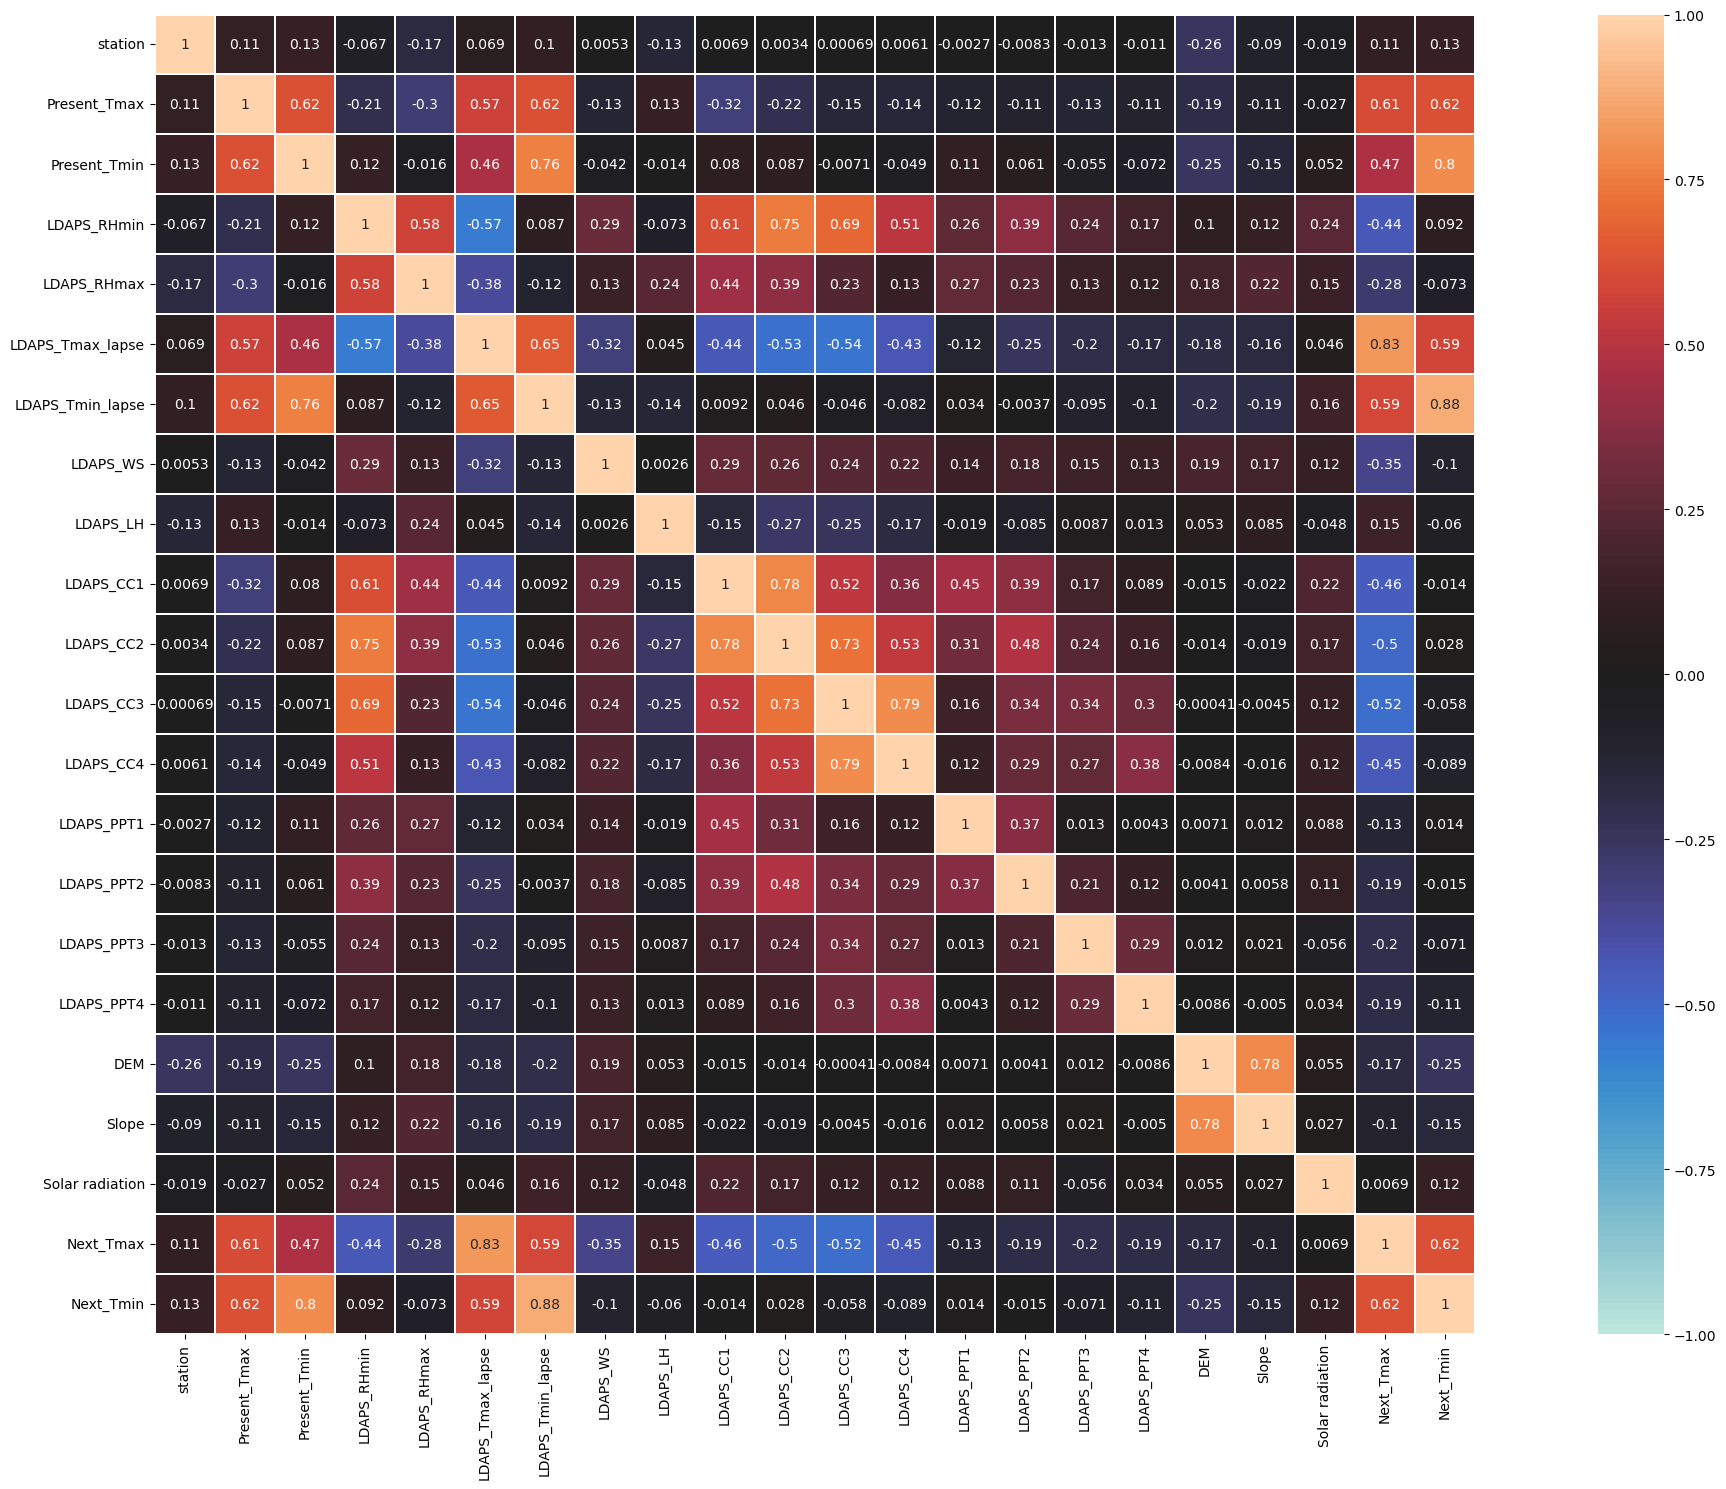

In [15]:
# Plotting the correlation

df1_corr = df1.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df1_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = 0.1)
plt.tight_layout()

In [16]:
df1.skew()

station             0.000000
Present_Tmax       -0.264215
Present_Tmin       -0.359513
LDAPS_RHmin         0.303578
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.225096
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            1.562204
LDAPS_LH            0.672151
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          5.325873
LDAPS_PPT2          5.714821
LDAPS_PPT3          6.370279
LDAPS_PPT4          6.744793
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.336700
Next_Tmin          -0.397570
dtype: float64

In [17]:
from scipy import stats

from sklearn.preprocessing import PowerTransformer
# List of columns to transform

columns_to_transform = [
    'LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2',
    'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'
]

# Initialize the transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to each specified column without reshape
for column in columns_to_transform:
    df1[[column]] = pt.fit_transform(df1[[column]])


In [18]:
df1.skew()

station             0.000000
Present_Tmax       -0.264215
Present_Tmin       -0.359513
LDAPS_RHmin         0.303578
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.225096
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            0.004202
LDAPS_LH            0.672151
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.463967
LDAPS_PPT2          1.646387
LDAPS_PPT3          1.824595
LDAPS_PPT4          2.059402
DEM                 0.039436
Slope               0.233914
Solar radiation    -0.511006
Next_Tmax          -0.336700
Next_Tmin          -0.397570
dtype: float64

In [19]:
# Encoding date time column

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

df1['Date'] = OE.fit_transform(df1['Date'].values.reshape(-1,1))

In [20]:
x = df1.drop(['Next_Tmax'], axis = 1)

y = df1['Next_Tmax']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)


In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)


(((6200, 22), (1550, 22)), ((6200,), (1550,)))

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a range of hyperparameters for the RandomForestRegressor
param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object
rscv = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=1,  # Controls the verbosity: the higher, the more messages
    random_state=42,  # Ensures reproducible results
    n_jobs=-1 
)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred_train = rf_model.predict(x_train)  # Predictions on training set
y_pred_test = rf_model.predict(x_test)    # Predictions on test set

# Calculate metrics for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('R2_score on test data: ', r2_test)
print('Mean Absolute Error on test data: ', mae_test)
print('Mean squared Error on test data: ', mse_test)
print('Root Mean squared Error on test data: ', rmse_test)
print('Root Mean squared Error on train data: ', rmse_train)


R2_score on test data:  0.9189610841362627
Mean Absolute Error on test data:  0.6631496774193547
Mean squared Error on test data:  0.75726804
Root Mean squared Error on test data:  0.8702114915352475
Root Mean squared Error on train data:  0.3468816112999714


In [27]:
X = df1.drop(['Next_Tmin'], axis = 1)

Y = df1['Next_Tmin']

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [29]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
(X_train.shape, X_test.shape), (Y_train.shape, Y_test.shape)


(((6200, 22), (1550, 22)), ((6200,), (1550,)))

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
Y_pred_train = rf_model.predict(X_train)  # Predictions on training set
Y_pred_test = rf_model.predict(X_test)    # Predictions on test set

# Calculate metrics for test set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_test = r2_score(Y_test, y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)

# Calculate RMSE for training set
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

print('R2_score on test data: ', r2_test)
print('Mean Absolute Error on test data: ', mae_test)
print('Mean squared Error on test data: ', mse_test)
print('Root Mean squared Error on test data: ', rmse_test)
print('Root Mean squared Error on train data: ', rmse_train)


R2_score on test data:  -9.172659000816816
Mean Absolute Error on test data:  0.5431270967741935
Mean squared Error on test data:  0.5112028858064512
Root Mean squared Error on test data:  0.7149845353617456
Root Mean squared Error on train data:  0.2770934042474119
